In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.DEBUG) 

# A1

In [65]:
data=pd.read_csv('purchaseData.csv')
dimensionality=data.shape[1]
No_of_vectors=data.shape[0]
(No_of_vectors,dimensionality)

(10, 5)

# A2

In [66]:
A=data.drop(columns=['Customer','Payment (Rs)'])
B=data['Payment (Rs)']
rank_A=np.linalg.matrix_rank(A)
rank_A = 5

logging.info(f"The rank of A is: {rank_A}")
#pseudo inverse

pseudo_inverse=np.linalg.pinv(A)
#multiplying this pseudo inverse with B gives us the X (i.e., the paramenters of the equation)

X=pseudo_inverse @ B
logging.info(X)
logging.info(np.dot(A.iloc[0,:],X))

INFO:root:The rank of A is: 5
INFO:root:[ 1. 55. 18.]
INFO:root:386.0000000000002


# A3

In [67]:
# classify function used for changing value according to the given condition
def classify(val):
    if val>200:
        return 1
    return 0
# Apply function 
data['Customer category']=data['Payment (Rs)'].apply(classify)

train=data.drop(columns=['Customer','Customer category']).iloc[0:5,:]
test=data.drop(columns=['Customer','Customer category']).iloc[5:10,:]
B=data['Customer category'].iloc[0:5]
pseudo_inverse=np.linalg.pinv(train)

#multiplying this pseudo inverse with B gives us the X (i.e., the paramenters of the equation)
X=pseudo_inverse @ B
logging.info(X)
for i in range(0,5):
    logging.info(round(np.dot(test.iloc[i,:],X)))
data

INFO:root:[-0.01382408 -0.00952612  0.03007677  0.00362152]
INFO:root:0
INFO:root:1
INFO:root:1
INFO:root:0
INFO:root:1


Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   
5      C_6           22             1                 5           167   
6      C_7           15             4                 2           271   
7      C_8           18             4                 2           274   
8      C_9           21             1                 4           148   
9     C_10           16             2                 4           198   

   Customer category  
0                  1  
1                  1  
2                  1  
3                  0  
4                  1  
5                  0  
6                  1  
7                  1  
8                  0  
9                  0

# A4

In [68]:
data=pd.read_csv('IRCTCdata.csv')
data['Price']=data['Price'].str.replace(',','').astype('float')
population_mean=data['Price'].mean()

In [69]:
def day_price_mean_finder(day):  
    sample_mean=np.mean(data[data['Day']==day]['Price'])
    variance=np.var(data[data['Day']==day]['Price'])
    return (sample_mean,variance)

In [70]:
logging.info(f"Sample mean price of wednesday, Variance : {day_price_mean_finder("Wed")}")
logging.info(f"Sample mean price of wednesday, Variance : {day_price_mean_finder("Apr")}")

INFO:root:Sample mean price of wednesday, Variance : (1550.7060000000001, 56780.759163999974)
INFO:root:Sample mean price of wednesday, Variance : (nan, nan)


In [71]:
# Remove percentage signs and convert 'Chg%' column to float
data['Chg%'] = data['Chg%'].str.replace('%', '').astype('float')
# Get the total number of entries
total_entries = data['Chg%'].shape[0]
negative_values = sum(data['Chg%'].apply(lambda x: x < 0))
# Calculate probability of making a loss
probability_of_loss = negative_values / total_entries
logging.info(probability_of_loss)

INFO:root:0.4979919678714859


In [72]:
# Filter data for Wednesdays
wed_data = data[data['Day'] == 'Wed']
# Count positive get_all_numeric_columns percentages on Wednesdays
positive_wed = sum(wed_data['Chg%'].apply(lambda x: x>0))
# Get the total number of Wednesday entries
total_wed = wed_data.shape[0]
profit_wed = positive_wed / total_wed if total_wed > 0 else 0  # Handle division by zero
logging.info(profit_wed)

INFO:root:0.42


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


<BarContainer object of 249 artists>

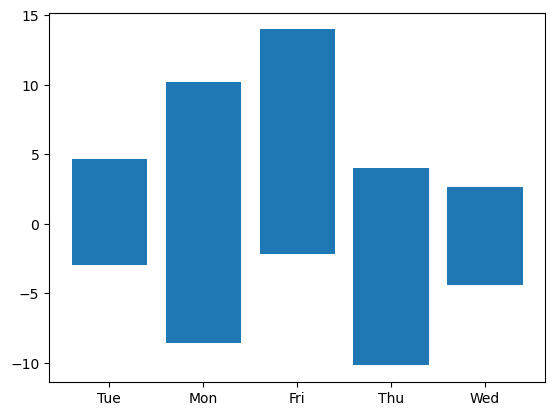

In [73]:
plt.bar(data['Day'],data['Chg%'])

# A5

In [74]:
data=pd.read_csv('Thyroid.csv')

In [75]:
from sklearn.preprocessing import LabelEncoder
# Ordinal variables
ordinal_variables = [
    "TSH measured", "T3 measured", "TT4 measured", "T4U measured", "FTI measured"
]

# Nominal variables
nominal_variables = [
    "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication", 
    "sick", "pregnant", "thyroid surgery", "I131 treatment", 
    "query hypothyroid", "query hyperthyroid", "lithium", 
    "goitre", "tumor", "hypopituitary", "psych", 
    "TBG measured", "referral source", "Condition"
]

# Label encoding for ordinal variables
label_encoder = LabelEncoder()
for col in ordinal_variables:
    data[col] = label_encoder.fit_transform(data[col].astype(str))
# one hot encoding for Nominal  variables
data = pd.get_dummies(data, columns=nominal_variables, drop_first=True)

In [76]:
numeric_columns=list(data.select_dtypes(include=['number']).columns)
for col in numeric_columns:
    data[col]=data[col].fillna(np.nanmedian(data[col]))
numeric_columns

['Record ID',
 'age',
 'TSH measured',
 'T3 measured',
 'TT4 measured',
 'T4U measured',
 'FTI measured']

In [77]:
# Initially one hot encoding gives boolean values, for easy calculation we convert them into binary
boolean_data=list(data.columns)[13:66]
data[boolean_data]=data[boolean_data].astype('int')
remaining_data=list(data.columns)[0:13]

for col in remaining_data:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data

Record ID  age  TSH measured  TSH  T3 measured   T3  TT4 measured  \
0     840801013   29             1  0.3            0  NaN             0   
1     840801014   29             1  1.6            1  1.9             1   
2     840801042   41             0  NaN            0  NaN             0   
3     840803046   36             0  NaN            0  NaN             0   
4     840803047   32             0  NaN            0  NaN             0   
...         ...  ...           ...  ...          ...  ...           ...   
9167  870119022   56             0  NaN            0  NaN             1   
9168  870119023   22             0  NaN            0  NaN             1   
9169  870119025   69             0  NaN            0  NaN             1   
9170  870119027   47             0  NaN            0  NaN             1   
9171  870119035   31             0  NaN            0  NaN             1   

        TT4  T4U measured   T4U  ...  Condition_MI  Condition_MK  Condition_N  \
0       NaN             0   NaN  ...             0             0            0   
1     128.0             0   NaN  ...             0             0            0   
2       NaN             0   NaN  ...             0             0            0   
3       NaN             0   NaN  ...             0             0            0   
4       NaN             0   NaN  ...             0             0            0   
...     ...           ...   ...  ...           ...           ...          ...   
9167   64.0             1  0.83  ...             0             0            0   
9168   91.0             1  0.92  ...             0             0            0   
9169  113.0             1  1.27  ...             0             0            0   
9170   75.0             1  0.85  ...             0             0            0   
9171   66.0             1  1.02  ...             0             0            0   

      Condition_NO CONDITION  Condition_O  Condition_OI  Condition_P  \
0                          1            0             0            0   
1                          1            0             0            0   
2                          1            0             0            0   
3                          1            0             0            0   
4                          0            0             0            0   
...                      ...          ...           ...          ...   
9167                       1            0             0            0   
9168                       1            0             0            0   
9169                       0            0             0            0   
9170                       1            0             0            0   
9171                       1            0             0            0   

      Condition_Q  Condition_R  Condition_S  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            1  
...           ...          ...          ...  
9167            0            0            0  
9168            0            0            0  
9169            0            0            0  
9170            0            0            0  
9171            0            0            0  

[9172 rows x 66 columns]

In [78]:
#Finding outliers using box plot theory
Q1=data[numeric_columns].quantile(0.25)
Q3=data[numeric_columns].quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
lower_limit,upper_limit
outliers_iqr=((data[numeric_columns]<lower_limit)|(data[numeric_columns]>upper_limit))
outliers = data[outliers_iqr.any(axis=1)]
outliers

Record ID  age  TSH measured  TSH  T3 measured   T3  TT4 measured  \
0     840801013   29             1  0.3            0  NaN             0   
1     840801014   29             1  1.6            1  1.9             1   
2     840801042   41             0  NaN            0  NaN             0   
3     840803046   36             0  NaN            0  NaN             0   
4     840803047   32             0  NaN            0  NaN             0   
...         ...  ...           ...  ...          ...  ...           ...   
9167  870119022   56             0  NaN            0  NaN             1   
9168  870119023   22             0  NaN            0  NaN             1   
9169  870119025   69             0  NaN            0  NaN             1   
9170  870119027   47             0  NaN            0  NaN             1   
9171  870119035   31             0  NaN            0  NaN             1   

        TT4  T4U measured   T4U  ...  Condition_MI  Condition_MK  Condition_N  \
0       NaN             0   NaN  ...             0             0            0   
1     128.0             0   NaN  ...             0             0            0   
2       NaN             0   NaN  ...             0             0            0   
3       NaN             0   NaN  ...             0             0            0   
4       NaN             0   NaN  ...             0             0            0   
...     ...           ...   ...  ...           ...           ...          ...   
9167   64.0             1  0.83  ...             0             0            0   
9168   91.0             1  0.92  ...             0             0            0   
9169  113.0             1  1.27  ...             0             0            0   
9170   75.0             1  0.85  ...             0             0            0   
9171   66.0             1  1.02  ...             0             0            0   

      Condition_NO CONDITION  Condition_O  Condition_OI  Condition_P  \
0                          1            0             0            0   
1                          1            0             0            0   
2                          1            0             0            0   
3                          1            0             0            0   
4                          0            0             0            0   
...                      ...          ...           ...          ...   
9167                       1            0             0            0   
9168                       1            0             0            0   
9169                       0            0             0            0   
9170                       1            0             0            0   
9171                       1            0             0            0   

      Condition_Q  Condition_R  Condition_S  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            1  
...           ...          ...          ...  
9167            0            0            0  
9168            0            0            0  
9169            0            0            0  
9170            0            0            0  
9171            0            0            0  

[1270 rows x 66 columns]

In [79]:
# Calculation of mean, variance for all numeric data
mean=data[numeric_columns].mean()
variance=data[numeric_columns].var()
mean,variance
logging.info(f"Mean : {mean}")
logging.info(f"Variance : {variance}")

INFO:root:Mean : Record ID       8.529473e+08
age             7.355582e+01
TSH measured    9.081989e-01
T3 measured     7.160925e-01
TT4 measured    9.518099e-01
T4U measured    9.117968e-01
FTI measured    9.125600e-01
dtype: float64
INFO:root:Variance : Record ID       5.748625e+13
age             1.401801e+06
TSH measured    8.338278e-02
T3 measured     2.033262e-01
TT4 measured    4.587286e-02
T4U measured    8.043219e-02
FTI measured    7.980298e-02
dtype: float64


# A6

In [80]:
# Imputing numeric data with median
numeric_columns=list(data.select_dtypes(include=['number']).columns)
for col in numeric_columns:
    data[col]=data[col].fillna(np.nanmedian(data[col]))
data

Record ID  age  TSH measured  TSH  T3 measured   T3  TT4 measured  \
0     840801013   29             1  0.3            0  1.9             0   
1     840801014   29             1  1.6            1  1.9             1   
2     840801042   41             0  1.4            0  1.9             0   
3     840803046   36             0  1.4            0  1.9             0   
4     840803047   32             0  1.4            0  1.9             0   
...         ...  ...           ...  ...          ...  ...           ...   
9167  870119022   56             0  1.4            0  1.9             1   
9168  870119023   22             0  1.4            0  1.9             1   
9169  870119025   69             0  1.4            0  1.9             1   
9170  870119027   47             0  1.4            0  1.9             1   
9171  870119035   31             0  1.4            0  1.9             1   

        TT4  T4U measured   T4U  ...  Condition_MI  Condition_MK  Condition_N  \
0     104.0             0  0.96  ...             0             0            0   
1     128.0             0  0.96  ...             0             0            0   
2     104.0             0  0.96  ...             0             0            0   
3     104.0             0  0.96  ...             0             0            0   
4     104.0             0  0.96  ...             0             0            0   
...     ...           ...   ...  ...           ...           ...          ...   
9167   64.0             1  0.83  ...             0             0            0   
9168   91.0             1  0.92  ...             0             0            0   
9169  113.0             1  1.27  ...             0             0            0   
9170   75.0             1  0.85  ...             0             0            0   
9171   66.0             1  1.02  ...             0             0            0   

      Condition_NO CONDITION  Condition_O  Condition_OI  Condition_P  \
0                          1            0             0            0   
1                          1            0             0            0   
2                          1            0             0            0   
3                          1            0             0            0   
4                          0            0             0            0   
...                      ...          ...           ...          ...   
9167                       1            0             0            0   
9168                       1            0             0            0   
9169                       0            0             0            0   
9170                       1            0             0            0   
9171                       1            0             0            0   

      Condition_Q  Condition_R  Condition_S  
0               0            0            0  
1               0            0            0  
2               0            0            0  
3               0            0            0  
4               0            0            1  
...           ...          ...          ...  
9167            0            0            0  
9168            0            0            0  
9169            0            0            0  
9170            0            0            0  
9171            0            0            0  

[9172 rows x 66 columns]

In [81]:
data.to_csv('new.csv')

# A7

In [82]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# here first column is records so we are considering from second column
X=data[1:]
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

Record ID       age  TSH measured       TSH  T3 measured        T3  \
0     -1.602401 -0.037636      0.317951 -0.141651     0.629536 -0.067286   
1     -1.602398 -0.027501     -3.145143 -0.150319    -1.588472 -0.067286   
2     -1.602133 -0.031724     -3.145143 -0.150319    -1.588472 -0.067286   
3     -1.602133 -0.035103     -3.145143 -0.150319    -1.588472 -0.067286   
4     -1.602133 -0.011454     -3.145143 -0.150319    -1.588472 -0.067286   
...         ...       ...           ...       ...          ...       ...   
9166   2.264947 -0.014832     -3.145143 -0.150319    -1.588472 -0.067286   
9167   2.264947 -0.043549     -3.145143 -0.150319    -1.588472 -0.067286   
9168   2.264947 -0.003852     -3.145143 -0.150319    -1.588472 -0.067286   
9169   2.264947 -0.022433     -3.145143 -0.150319    -1.588472 -0.067286   
9170   2.264948 -0.035947     -3.145143 -0.150319    -1.588472 -0.067286   

      TT4 measured       TT4  T4U measured       T4U  ...  Condition_MI  \
0         0.224756  0.533182     -3.217180 -0.076506  ...     -0.014769   
1        -4.449260 -0.122178     -3.217180 -0.076506  ...     -0.014769   
2        -4.449260 -0.122178     -3.217180 -0.076506  ...     -0.014769   
3        -4.449260 -0.122178     -3.217180 -0.076506  ...     -0.014769   
4        -4.449260 -0.122178     -3.217180 -0.076506  ...     -0.014769   
...            ...       ...           ...       ...  ...           ...   
9166      0.224756 -1.214444      0.310831 -0.755806  ...     -0.014769   
9167      0.224756 -0.477164      0.310831 -0.285521  ...     -0.014769   
9168      0.224756  0.123582      0.310831  1.543364  ...     -0.014769   
9169      0.224756 -0.914071      0.310831 -0.651298  ...     -0.014769   
9170      0.224756 -1.159831      0.310831  0.237018  ...     -0.014769   

      Condition_MK  Condition_N  Condition_NO CONDITION  Condition_O  \
0        -0.041805    -0.110181                0.595527    -0.039101   
1        -0.041805    -0.110181                0.595527    -0.039101   
2        -0.041805    -0.110181                0.595527    -0.039101   
3        -0.041805    -0.110181               -1.679184    -0.039101   
4        -0.041805    -0.110181                0.595527    -0.039101   
...            ...          ...                     ...          ...   
9166     -0.041805    -0.110181                0.595527    -0.039101   
9167     -0.041805    -0.110181                0.595527    -0.039101   
9168     -0.041805    -0.110181               -1.679184    -0.039101   
9169     -0.041805    -0.110181                0.595527    -0.039101   
9170     -0.041805    -0.110181                0.595527    -0.039101   

      Condition_OI  Condition_P  Condition_Q  Condition_R  Condition_S  
0        -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
1        -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
2        -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
3        -0.010443    -0.023356    -0.039101    -0.147778    10.338961  
4        -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
...            ...          ...          ...          ...          ...  
9166     -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
9167     -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
9168     -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
9169     -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  
9170     -0.010443    -0.023356    -0.039101    -0.147778    -0.096722  

[9171 rows x 66 columns]

# A8

In [83]:
get_all_numeric_columns=data.columns[13:]
for i in get_all_numeric_columns:
    data[i]=data[i].astype(int)
data
from sklearn.metrics import jaccard_score
v1=data[get_all_numeric_columns].iloc[0,:]
v2=data[get_all_numeric_columns].iloc[1,:]
jc = jaccard_score(v1,v2)
jc

0.75

In [84]:
def simple_matching_coefficient(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    matches = np.sum(v1 == v2)
    return matches / len(v1)
logging.info(simple_matching_coefficient(v1, v2))

INFO:root:0.9811320754716981


# A9

In [85]:
def cosine_similarity_manual(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    dot_product = np.dot(v1, v2)
    norm_v1 = np.linalg.norm(v1)
    norm_v2 = np.linalg.norm(v2)
    return dot_product / (norm_v1 * norm_v2)

In [86]:
v1=data.iloc[0,:]
v2=data.iloc[10,:]
logging.info(cosine_similarity_manual(v1, v2))

INFO:root:0.9999999999999989


# A10

In [87]:
from sklearn.metrics import jaccard_score, pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity

In [88]:
get_all_numeric_columns=data.columns[13:]
get_all_numeric_columns

Index(['sex_F', 'sex_M', 'on thyroxine_t', 'query on thyroxine_t',
       'on antithyroid medication_t', 'sick_t', 'pregnant_t',
       'thyroid surgery_t', 'I131 treatment_t', 'query hypothyroid_t',
       'query hyperthyroid_t', 'lithium_t', 'goitre_t', 'tumor_t',
       'hypopituitary_t', 'psych_t', 'TBG measured_t', 'referral source_SVHC',
       'referral source_SVHD', 'referral source_SVI', 'referral source_WEST',
       'referral source_other', 'Condition_AK', 'Condition_B', 'Condition_C',
       'Condition_C|I', 'Condition_D', 'Condition_D|R', 'Condition_E',
       'Condition_F', 'Condition_FK', 'Condition_G', 'Condition_GI',
       'Condition_GK', 'Condition_GKJ', 'Condition_H|K', 'Condition_I',
       'Condition_J', 'Condition_K', 'Condition_KJ', 'Condition_L',
       'Condition_LJ', 'Condition_M', 'Condition_MI', 'Condition_MK',
       'Condition_N', 'Condition_NO CONDITION', 'Condition_O', 'Condition_OI',
       'Condition_P', 'Condition_Q', 'Condition_R', 'Condition_S'],
 

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000022621297FB0>


[1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0.]
SMC is  0.9811320754716981
JMC is  0.75
Cosine Similarity :  0.9946118680642435


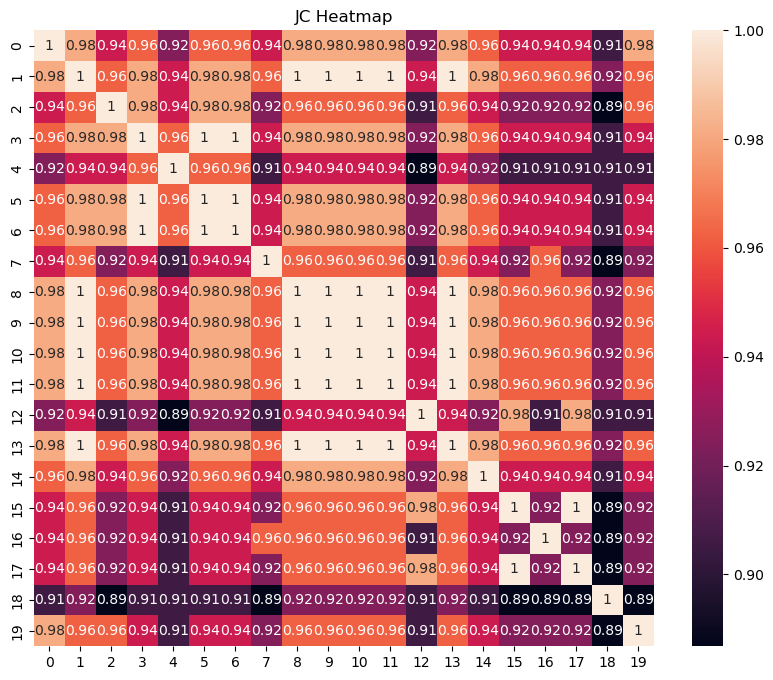

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x00000226213B0740>


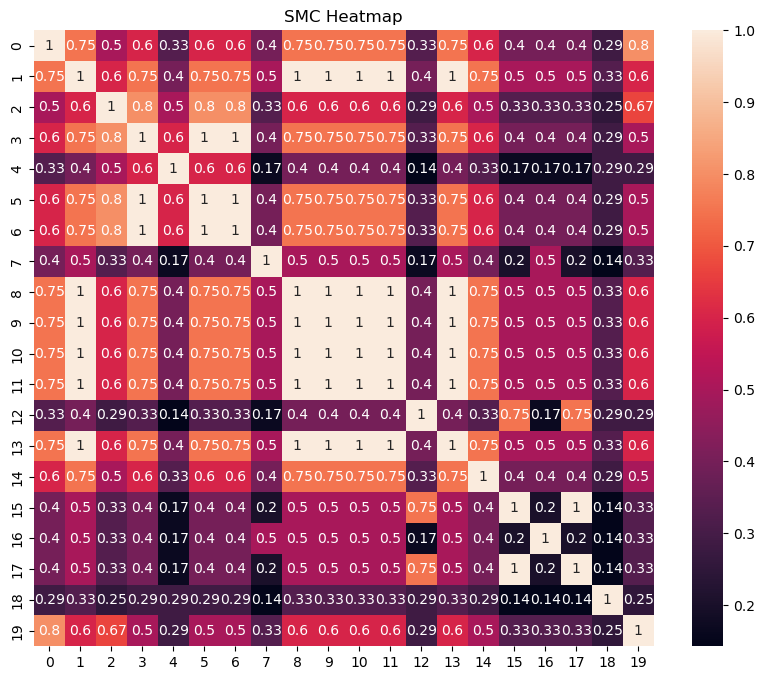

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x0000022624FA1F70>


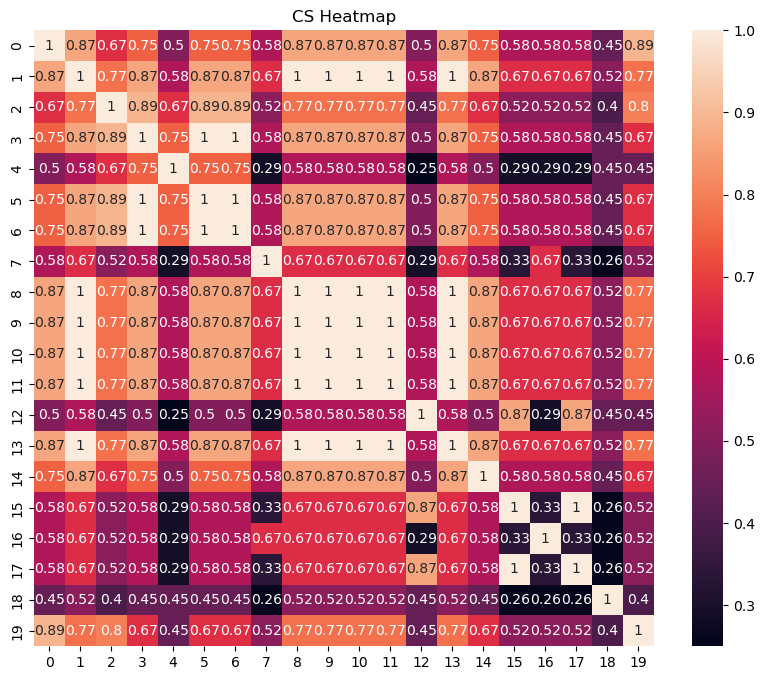

In [89]:
binary_column  = list(get_all_numeric_columns)
data[binary_column] = data[binary_column].replace({'t': 1, 'f': 0})

vect1 = data.loc[0,binary_column].values
vect2 = data.loc[1,binary_column].values
print(vect1)
print(vect2)
def SMC_and_JMC(vec1,vec2):
  f00 , f11 , f01 , f10 = 0 , 0 , 0 ,0
  for i in range(len(vec1)):
    if(vec1[i]==0 and vec2[i]==0):
      f00+=1
    elif(vec1[i] == 1 and vec2[i] == 1):
      f11+=1
    elif(vec1[i] == 0 and vec2[i] ==1):
      f01+=1
    elif(vec1[i] == 1 and vec2[i] == 0):
      f10+=1

  denominator_smc = f00 + f01 + f10 + f11
  denominator_jmc = f11 + f01 + f10
  SMC = (f00 + f11) / denominator_smc if denominator_smc != 0 else 0
  JMC = f11 / denominator_jmc if denominator_jmc != 0 else 0
  return SMC , JMC

SMC , JMC = SMC_and_JMC(vect1,vect2)
print("SMC is ",SMC)
print("JMC is ",JMC)


def cosine_sim(vect1 , vect2):
  dot_product = np.dot(vect1, vect2)
  magnitude_vect1 = np.linalg.norm(vect1)
  magnitude_vect2 = np.linalg.norm(vect2)
  if magnitude_vect1 == 0 or magnitude_vect2 == 0:
        return 0

  CS = dot_product / (magnitude_vect1 * magnitude_vect2)
  return CS
numeric_columns = ["TSH","T3","TT4","T4U","FTI","TBG"]

vect1 = data.loc[0, numeric_columns].values
vect2 = data.loc[1, numeric_columns].values



print("Cosine Similarity : ",cosine_sim(vect1,vect2))
def similarities(data):
  n=len(data)
  jc_matrix = np.zeros((n,n))
  smc_matrix= np.zeros((n,n))
  cosine_matrix = np.zeros((n,n))
  for i in range(n):
    for j in range(n):
      if i == j:
        jc_matrix[i][j]=1
        smc_matrix[i][j]=1
        cosine_matrix[i][j]=1
      else:
        jc_matrix[i][j],smc_matrix[i][j] = SMC_and_JMC(data[i],data[j])
        cosine_matrix[i][j] = cosine_sim(data[i],data[j])

  return smc_matrix,jc_matrix,cosine_matrix

data[binary_column] = data[binary_column].replace({'t': 1, 'f': 0})

data = data.loc[:19,binary_column].values
smc_matrix , jc_matrix , cosine_matrix = similarities(data)


def plot_heatmap(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix,annot = True)
    plt.title(title)
    plt.show()

plot_heatmap(jc_matrix, "JC Heatmap")
plot_heatmap(smc_matrix, "SMC Heatmap")
plot_heatmap(cosine_matrix, "CS Heatmap")

